**Welcome** to another image competition. For this competition, we are required to build an algorithm that identifies which camera model captured an image. Without wasting anytime, let's deep dive in the data.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import os
import glob
from pathlib import Path
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mimg
from skimage.io import imread, imshow, imsave
from PIL import Image
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

sample_submission.csv
test
train



In [2]:
input_path = Path('../input')
train_path = input_path / 'train'
test_path = input_path / 'test'

Images in the training data were captured with 10 different camera models and all the images taken by a particular camera model are arranged in a single folder with same name as the camera model.

In [3]:
# Get all the folders. Each folder name is based on the device name
cameras = os.listdir(train_path)

# Initialize an empty list
train_images = []

# Iterate over each file in each sub-folder
for camera in cameras:
    for fname in sorted(os.listdir(train_path / camera)):
        train_images.append((camera, '../input/train/' + camera + '/' + fname))
        
# Convert the list to a pandas dataframe and save it for future use
train = pd.DataFrame(data=train_images, columns=['camera', 'fname'])
print("Total number of training samples: ", train.shape[0])
train.to_csv('./train_data.csv', index=None)
# Random samples from the data
train.sample(10)

Total number of training samples:  2750


,camera,fname
1320,iPhone-6,../input/train/iPhone-6/(iP6)5.jpg
2308,Sony-NEX-7,../input/train/Sony-NEX-7/(Nex7)197.JPG
2607,LG-Nexus-5x,../input/train/LG-Nexus-5x/(LG5x)218.jpg
2466,Sony-NEX-7,../input/train/Sony-NEX-7/(Nex7)91.JPG
1262,iPhone-6,../input/train/iPhone-6/(iP6)245.jpg
824,Motorola-X,../input/train/Motorola-X/(MotoX)99.jpg
1719,iPhone-4s,../input/train/iPhone-4s/(iP4s)161.jpg
1350,iPhone-6,../input/train/iPhone-6/(iP6)77.jpg
1199,iPhone-6,../input/train/iPhone-6/(iP6)189.jpg
938,Samsung-Galaxy-S4,../input/train/Samsung-Galaxy-S4/(GalaxyS4)200...


The images in the test data have also been captured with the same 10 camera models but with a different device. 

In [4]:
# Do the same for test images
test_images = []
for fname in sorted(os.listdir(test_path)):
    test_images.append('../input/test/' + fname)

test = pd.DataFrame(test_images, columns=['fname'])
print("Number of test samples: ", test.shape[0])
test.to_csv('./test_data.csv', index=None)
test.head(10)

Number of test samples:  2640


,fname
0,../input/test/img_0002a04_manip.tif
1,../input/test/img_001e31c_unalt.tif
2,../input/test/img_00275cf_manip.tif
3,../input/test/img_0034113_unalt.tif
4,../input/test/img_00344b7_unalt.tif
5,../input/test/img_0062ce8_manip.tif
6,../input/test/img_00885c3_manip.tif
7,../input/test/img_008a869_unalt.tif
8,../input/test/img_008fb06_manip.tif
9,../input/test/img_00c98af_manip.tif


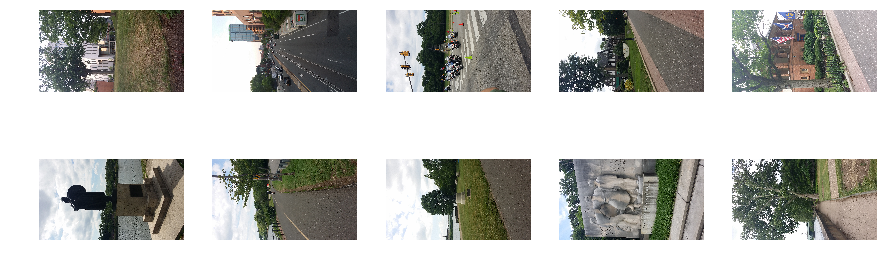

In [5]:
# Let's look at some samples from the training data first
f,ax = plt.subplots(2,5, figsize=(15,5))
for i in range(10):
    img = imread(train['fname'][i])
    ax[i//5, i%5].imshow(img)
    ax[i//5, i%5].axis('off')
plt.show()    

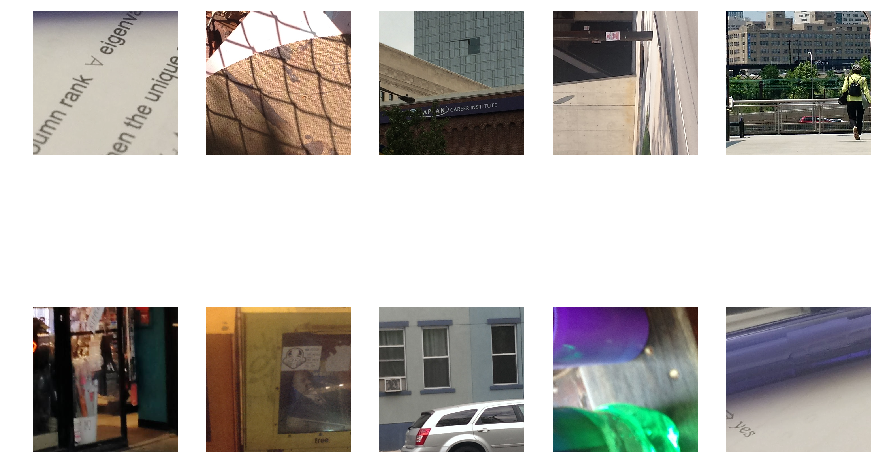

In [6]:
# Let's look at some samples from the test data 
f,ax = plt.subplots(2,5, figsize=(15,10))
for i in range(10):
    # Use PIL to read the tiff file
    img = Image.open(test["fname"][i])
    # Convert it into a numpy array
    img = np.array(img)
    ax[i//5, i%5].imshow(img)
    ax[i//5, i%5].axis('off')
plt.show()

The training data contains full images while the test data contains a centre crop of size 500x500. Also, as indicated, half of the test images have been altered with different types of  processing techniques which are:
* JPEG compression with quality factor = 90
* JPEG compression with quality factor = 90
* resizing (via bicubic interpolation) by a factor of 0.5
* resizing (via bicubic interpolation) by a factor of 0.8
* resizing (via bicubic interpolation) by a factor of 1.5
* resizing (via bicubic interpolation) by a factor of 2.0
* gamma correction using gamma = 0.8
* gamma correction using gamma = 1.2

This information can be very useful while modelling an archietcture for the given problem.
